In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
import time
import timeit
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [8]:
columns = ['Sample code number',
    'Clump Thickness',          
    'Uniformity of Cell Size',       
    'Uniformity of Cell Shape',      
    'Marginal Adhesion',             
    'Single Epithelial Cell Size',   
    'Bare Nuclei',                   
    'Bland Chromatin',           
    'Normal Nucleoli',               
    'Mitoses',                       
    'Class']

In [9]:
df = pd.read_csv(filepath_or_buffer='breast-cancer-wisconsin.data',header=None)

In [10]:
df.columns = columns

In [11]:
df.columns

Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [12]:
df = df[~df['Bare Nuclei'].isin(['?'])]

In [13]:
df.Class.value_counts()

2    444
4    239
Name: Class, dtype: int64

In [14]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [15]:
features = df.drop(['Sample code number', 'Class'], axis=1)

In [24]:
X = features
y = df['Class']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [65]:
rfc = ensemble.RandomForestClassifier(n_estimators=100,random_state=1)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(features)
cross_val_score(rfc, X_test, y_test, cv=5)

array([ 0.95238095,  0.97560976,  0.97560976,  0.95121951,  0.975     ])

In [66]:
confusion_matrix(df['Class'],y_pred)

array([[440,   4],
       [  2, 237]])

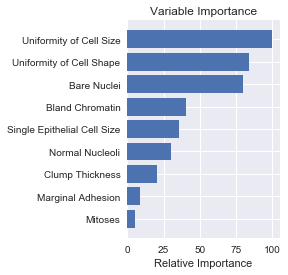

In [67]:
feature_importance = rfc.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()